<a href="https://colab.research.google.com/github/sadullahozcan/sarcopenia-eda-analysis-2/blob/main/EDA_09_Machine_Learning_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Library Imports**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import io

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
from google import colab
colab.drive.mount('/content/drive')

Mounted at /content/drive


**Step 2: Load Cleaned Data**


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/PROJECTS/Sarcopenia_Project/Data_Set_Files_2/sarcopenia-data-set_columns_corrected_12.xlsx')

In [ ]:
df.head()

,DM_Type2,OP,Total_Number_of_Chronic_Diseases,AT,CST,Gait_Speed,Grip_Str,STAR,Waist_Hip_Ratio,BMI,...,Job_retired,Job_security_personel,Job_self-employment,Job_teacher,Job_white_collar_below_55,Job_worker,Work_Status_unknown,Work_Status_working,Exercise_Status_1-2/week,Exercise_Status_3-4/week
0,True,True,3,50.2,12.5,1.21,32.0,1.81,1.00,27.8,...,False,False,False,False,False,False,False,False,False,True
1,False,False,0,49.0,12.1,1.42,47.0,1.38,1.12,35.5,...,False,False,False,False,False,False,False,False,False,False
2,False,False,0,37.3,8.7,1.18,33.0,1.20,0.96,31.2,...,False,True,False,False,False,False,False,False,False,True
3,False,True,4,29.5,8.3,1.23,25.0,1.11,1.03,26.6,...,False,False,False,False,True,False,False,False,True,False
4,False,False,3,39.5,11.0,1.31,31.0,1.26,0.97,31.3,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
sorted(df.columns)

['AT',
 'Age_Group_AGE 60-80',
 'Age_Group_AGE 80-100',
 'BMI',
 'CST',
 'Chronic_Diseases_COPD',
 'Chronic_Diseases_Dyslipidemia',
 'Chronic_Diseases_Hipotiroidi',
 'Chronic_Diseases_KAH',
 'DM_Type2',
 'Education_Primary School',
 'Education_Secondary School',
 'Education_University',
 'Education_illiterate',
 'Exercise_Status_1-2/week',
 'Exercise_Status_3-4/week',
 'Gait_Speed',
 'Gender_M',
 'Grip_Str',
 'Job_farmer',
 'Job_health care personel',
 'Job_housewife',
 'Job_no_job',
 'Job_numbers_below_ten',
 'Job_public officer',
 'Job_retired',
 'Job_security_personel',
 'Job_self-employment',
 'Job_teacher',
 'Job_white_collar_below_55',
 'Job_worker',
 'OP',
 'STAR',
 'Sarcopenia',
 'Total_Number_of_Chronic_Diseases',
 'Waist_Hip_Ratio',
 'Work_Status_unknown',
 'Work_Status_working']

In [ ]:
df.isnull().sum()

,0
DM_Type2,0
OP,0
Total_Number_of_Chronic_Diseases,0
AT,0
CST,0
Gait_Speed,0
Grip_Str,0
STAR,0
Waist_Hip_Ratio,0
BMI,0


In [ ]:
df.columns

Index(['DM_Type2', 'OP', 'Total_Number_of_Chronic_Diseases', 'AT', 'CST',
       'Gait_Speed', 'Grip_Str', 'STAR', 'Waist_Hip_Ratio', 'BMI',
       'Sarcopenia', 'Gender_M', 'Age_Group_AGE 60-80', 'Age_Group_AGE 80-100',
       'Education_Primary School', 'Education_Secondary School',
       'Education_University', 'Education_illiterate', 'Chronic_Diseases_COPD',
       'Chronic_Diseases_Dyslipidemia', 'Chronic_Diseases_Hipotiroidi',
       'Chronic_Diseases_KAH', 'Job_farmer', 'Job_health care personel',
       'Job_housewife', 'Job_no_job', 'Job_numbers_below_ten',
       'Job_public officer', 'Job_retired', 'Job_security_personel',
       'Job_self-employment', 'Job_teacher', 'Job_white_collar_below_55',
       'Job_worker', 'Work_Status_unknown', 'Work_Status_working',
       'Exercise_Status_1-2/week', 'Exercise_Status_3-4/week'],
      dtype='object')

**Data Leakage!!!**

In [ ]:
#Data Leakage Analysis -- Sonuçlar çok yüksek çıktığından ve over-fitting olmadığı anlaşıldığından data leakage olabileceği dikkate
#alınarak sarcopenia ile ilişkisi en yüksek olan feature lar veriden çıkartılarak yeniden run edildiğinde sonuçlar daha düşük çıktı. Burada
#birbiriyle korelasyonu yüksek veriler de dikkate alındı.

#df.drop(['AT'], axis=1, inplace=True)
df.drop(['STAR'], axis=1, inplace=True)
df.drop(['Grip_Str'], axis=1, inplace=True) # Doğrudan tanı kriteri olan değişken
#df.drop(['CST'], axis=1, inplace=True)
#df.drop(['Job_no_job'], axis=1, inplace=True)

**Step 3: Training Models on Subsets of Data**

3.1: Create Data Subsets (4000 Patients)
*   **Action:** Original dataset was randomly sampled to create subsets of 4000 patients.
*   **Consideration:** The subsets were also stratified to maintain class distribution, especially since the dataset is imbalanced.



In [ ]:
if len(df) < 4000:
  print("Warning: Dataset has less than 4000 patients. Cannot create 4000 patient subset.")
  df_4000 = None
else:
  # Stratified sampling for df_4000
  # Group by the target variable and sample from each group proportionally
  df_4000 = df.groupby('Sarcopenia').sample(n=int(4000 * df['Sarcopenia'].value_counts(normalize=True)[1]), random_state=42)
  # If the above leads to slightly less or more than n due to rounding, you might need to adjust
  # A safer way to ensure exactly n samples is to oversample/undersample from groups as needed or adjust n slightly
  # However, for demonstration and approximate subsets, this proportional sampling is common.

  # The following line ensures we have exactly 4000 rows if proportional sampling didn't achieve it exactly
  # This can introduce slight deviation from perfect stratification if counts are very small
  # A more robust approach might involve ensuring a minimum number of samples per group before sampling
  if len(df_4000) < 4000:
      remaining_samples = 4000 - len(df_4000)
      # Find rows not yet sampled and sample the remainder, ensuring no duplicates
      remaining_df = df[~df.index.isin(df_4000.index)]
      df_4000 = pd.concat([df_4000, remaining_df.sample(n=remaining_samples, random_state=42)])
  elif len(df_4000) > 4000:
       df_4000 = df_4000.sample(n=4000, random_state=42)


  X_4000 = df_4000.drop('Sarcopenia', axis=1)
  y_4000 = df_4000['Sarcopenia']
  # Now perform a stratified train-test split on the stratified subset
  X_train_4000, X_test_4000, y_train_4000, y_test_4000 = train_test_split(X_4000, y_4000, test_size=0.25, random_state=42, stratify=y_4000)


**Step 4: Train and Evaluate Decision Tree on 4000 Patient Subset**

In [ ]:
if df_4000 is not None:
  dt_classifier_4000 = DecisionTreeClassifier(random_state=42)
  dt_classifier_4000.fit(X_train_4000, y_train_4000)
  y_pred_dt_4000 = dt_classifier_4000.predict(X_test_4000)

  # Train sonuçlarını hesapla
  y_train_pred_dt = dt_classifier_4000.predict(X_train_4000)
  train_accuracy_dt = accuracy_score(y_train_4000, y_train_pred_dt)
  train_precision_dt = precision_score(y_train_4000, y_train_pred_dt)
  train_recall_dt = recall_score(y_train_4000, y_train_pred_dt)
  train_f1_dt = f1_score(y_train_4000, y_train_pred_dt)

  print(f"\nDecision Tree (Train) - Accuracy: {train_accuracy_dt:.4f}")
  print(f"Decision Tree (Train) - Precision: {train_precision_dt:.4f}")
  print(f"Decision Tree (Train) - Recall: {train_recall_dt:.4f}")
  print(f"Decision Tree (Train) - F1-Score: {train_f1_dt:.4f}")


  # Test sonuçlarını hesapla
  accuracy_dt_4000 = accuracy_score(y_test_4000, y_pred_dt_4000)
  precision_dt_4000 = precision_score(y_test_4000, y_pred_dt_4000)
  recall_dt_4000 = recall_score(y_test_4000, y_pred_dt_4000)
  f1_dt_4000 = f1_score(y_test_4000, y_pred_dt_4000)

  print(f"\nDecision Tree (4000 Patients) - Accuracy: {accuracy_dt_4000:.4f}")
  print(f"Decision Tree (4000 Patients) - Precision: {precision_dt_4000:.4f}")
  print(f"Decision Tree (4000 Patients) - Recall: {recall_dt_4000:.4f}")
  print(f"Decision Tree (4000 Patients) - F1-Score: {f1_dt_4000:.4f}")


Decision Tree (Train) - Accuracy: 1.0000
Decision Tree (Train) - Precision: 1.0000
Decision Tree (Train) - Recall: 1.0000
Decision Tree (Train) - F1-Score: 1.0000

Decision Tree (4000 Patients) - Accuracy: 0.8980
Decision Tree (4000 Patients) - Precision: 0.7800
Decision Tree (4000 Patients) - Recall: 0.8058
Decision Tree (4000 Patients) - F1-Score: 0.7927


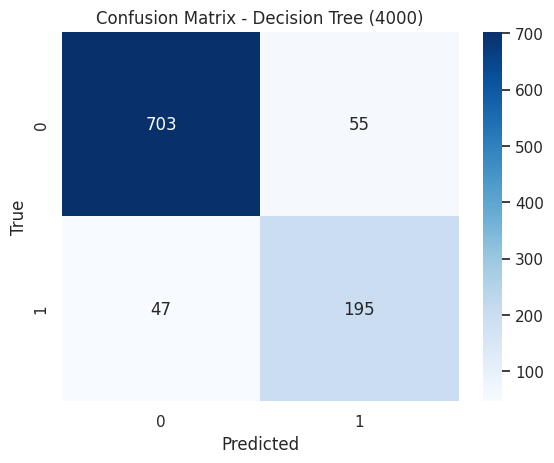

In [ ]:
# Confusion Matrix
cm_dt_4000 = confusion_matrix(y_test_4000, y_pred_dt_4000)
sns.heatmap(cm_dt_4000, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree (4000)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Step 5: Train and Evaluate XGBoost on 4000 Patient Subset**

In [ ]:
if df_4000 is not None:
  xgb_classifier_4000 = XGBClassifier(eval_metric='logloss', random_state=42)
  xgb_classifier_4000.fit(X_train_4000, y_train_4000)
  y_pred_xgb_4000 = xgb_classifier_4000.predict(X_test_4000)

  # Train sonuçlarını hesapla
  y_train_pred_xgb = xgb_classifier_4000.predict(X_train_4000)
  train_accuracy_xgb = accuracy_score(y_train_4000, y_train_pred_xgb)
  train_precision_xgb = precision_score(y_train_4000, y_train_pred_xgb)
  train_recall_xgb = recall_score(y_train_4000, y_train_pred_xgb)
  train_f1_xgb = f1_score(y_train_4000, y_train_pred_xgb)

  print(f"\nDecision Tree (Train) - Accuracy: {train_accuracy_dt:.4f}")
  print(f"Decision Tree (Train) - Precision: {train_precision_dt:.4f}")
  print(f"Decision Tree (Train) - Recall: {train_recall_dt:.4f}")
  print(f"Decision Tree (Train) - F1-Score: {train_f1_dt:.4f}")

  # Test sonuçlarını hesapla
  accuracy_xgb_4000 = accuracy_score(y_test_4000, y_pred_xgb_4000)
  precision_xgb_4000 = precision_score(y_test_4000, y_pred_xgb_4000)
  recall_xgb_4000 = recall_score(y_test_4000, y_pred_xgb_4000)
  f1_xgb_4000 = f1_score(y_test_4000, y_pred_xgb_4000)

  print(f"\nXGBoost (4000 Patients) - Accuracy: {accuracy_xgb_4000:.4f}")
  print(f"XGBoost (4000 Patients) - Precision: {precision_xgb_4000:.4f}")
  print(f"XGBoost (4000 Patients) - Recall: {recall_xgb_4000:.4f}")
  print(f"XGBoost (4000 Patients) - F1-Score: {f1_xgb_4000:.4f}")


Decision Tree (Train) - Accuracy: 1.0000
Decision Tree (Train) - Precision: 1.0000
Decision Tree (Train) - Recall: 1.0000
Decision Tree (Train) - F1-Score: 1.0000

XGBoost (4000 Patients) - Accuracy: 0.9410
XGBoost (4000 Patients) - Precision: 0.9336
XGBoost (4000 Patients) - Recall: 0.8140
XGBoost (4000 Patients) - F1-Score: 0.8698


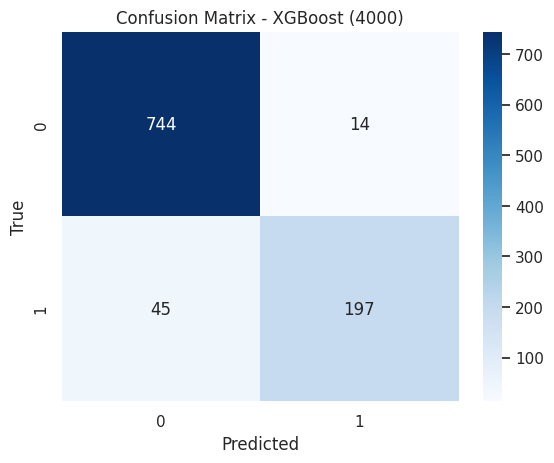

In [ ]:
# Confusion Matrix
cm_xgb_4000 = confusion_matrix(y_test_4000, y_pred_xgb_4000)
sns.heatmap(cm_xgb_4000, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost (4000)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Step 6: Training Models on Subsets of Data**

6.1: Create Data Subsets 5000 Patients
* **Action:** Original dataset was randomly sampled to create subsets of 5000 patients.
* **Consideration:** The subsets were also stratified to maintain class distribution, especially since the dataset is imbalanced.

In [ ]:
if len(df) < 5000:
  print("Warning: Dataset has less than 5000 patients. Cannot create 5000 patient subset.")
  df_5000 = None
else:
    # Stratified sampling for df_5000
    df_5000 = df.groupby('Sarcopenia').sample(n=int(5000 * df['Sarcopenia'].value_counts(normalize=True)[1]), random_state=42)

    if len(df_5000) < 5000:
        remaining_samples = 5000 - len(df_5000)
        remaining_df = df[~df.index.isin(df_5000.index)]
        df_5000 = pd.concat([df_5000, remaining_df.sample(n=remaining_samples, random_state=42)])
    elif len(df_5000) > 5000:
        df_5000 = df_5000.sample(n=5000, random_state=42)


    X_5000 = df_5000.drop('Sarcopenia', axis=1)
    y_5000 = df_5000['Sarcopenia']
    # Now perform a stratified train-test split on the stratified subset
    X_train_5000, X_test_5000, y_train_5000, y_test_5000 = train_test_split(X_5000, y_5000, test_size=0.25, random_state=42, stratify=y_5000)

**Step 7: Train and Evaluate Decision Tree on 5000 Patient Subset**

In [ ]:
if df_5000 is not None:
  dt_classifier_5000 = DecisionTreeClassifier(random_state=42)
  dt_classifier_5000.fit(X_train_5000, y_train_5000)
  y_pred_dt_5000 = dt_classifier_5000.predict(X_test_5000)

  # Train sonuçlarını hesapla
  y_train_pred_dt = dt_classifier_5000.predict(X_train_5000)
  train_accuracy_dt = accuracy_score(y_train_5000, y_train_pred_dt)
  train_precision_dt = precision_score(y_train_5000, y_train_pred_dt)
  train_recall_dt = recall_score(y_train_5000, y_train_pred_dt)
  train_f1_dt = f1_score(y_train_5000, y_train_pred_dt)

  print(f"\nDecision Tree (Train) - Accuracy: {train_accuracy_dt:.4f}")
  print(f"Decision Tree (Train) - Precision: {train_precision_dt:.4f}")
  print(f"Decision Tree (Train) - Recall: {train_recall_dt:.4f}")
  print(f"Decision Tree (Train) - F1-Score: {train_f1_dt:.4f}")

  # Test sonuçlarını hesapla
  accuracy_dt_5000 = accuracy_score(y_test_5000, y_pred_dt_5000)
  precision_dt_5000 = precision_score(y_test_5000, y_pred_dt_5000)
  recall_dt_5000 = recall_score(y_test_5000, y_pred_dt_5000)
  f1_dt_5000 = f1_score(y_test_5000, y_pred_dt_5000)

  print(f"\nDecision Tree (5000 Patients) - Accuracy: {accuracy_dt_5000:.4f}")
  print(f"Decision Tree (5000 Patients) - Precision: {precision_dt_5000:.4f}")
  print(f"Decision Tree (5000 Patients) - Recall: {recall_dt_5000:.4f}")
  print(f"Decision Tree (5000 Patients) - F1-Score: {f1_dt_5000:.4f}")


Decision Tree (Train) - Accuracy: 1.0000
Decision Tree (Train) - Precision: 1.0000
Decision Tree (Train) - Recall: 1.0000
Decision Tree (Train) - F1-Score: 1.0000

Decision Tree (5000 Patients) - Accuracy: 0.9080
Decision Tree (5000 Patients) - Precision: 0.7692
Decision Tree (5000 Patients) - Recall: 0.7843
Decision Tree (5000 Patients) - F1-Score: 0.7767


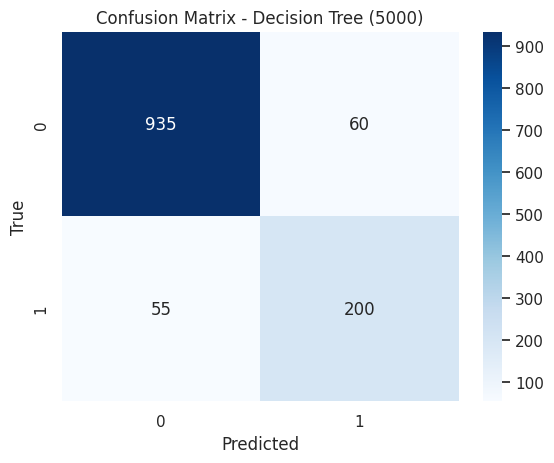

In [ ]:
# Confusion Matrix
cm_dt_5000 = confusion_matrix(y_test_5000, y_pred_dt_5000)
sns.heatmap(cm_dt_5000, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree (5000)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Step 8: Train and Evaluate XGBoost on 5000 Patient Subset**

In [ ]:
if df_5000 is not None:
  xgb_classifier_5000 = XGBClassifier(eval_metric='logloss', random_state=42)
  xgb_classifier_5000.fit(X_train_5000, y_train_5000)
  y_pred_xgb_5000 = xgb_classifier_5000.predict(X_test_5000)

  # Train sonuçlarını hesapla
  y_train_pred_xgb = xgb_classifier_5000.predict(X_train_5000)
  train_accuracy_xgb = accuracy_score(y_train_5000, y_train_pred_xgb)
  train_precision_xgb = precision_score(y_train_5000, y_train_pred_xgb)
  train_recall_xgb = recall_score(y_train_5000, y_train_pred_xgb)
  train_f1_xgb = f1_score(y_train_5000, y_train_pred_xgb)

  print(f"\nDecision Tree (Train) - Accuracy: {train_accuracy_dt:.4f}")
  print(f"Decision Tree (Train) - Precision: {train_precision_dt:.4f}")
  print(f"Decision Tree (Train) - Recall: {train_recall_dt:.4f}")
  print(f"Decision Tree (Train) - F1-Score: {train_f1_dt:.4f}")

  # Test sonuçlarını hesapla
  accuracy_xgb_5000 = accuracy_score(y_test_5000, y_pred_xgb_5000)
  precision_xgb_5000 = precision_score(y_test_5000, y_pred_xgb_5000)
  recall_xgb_5000 = recall_score(y_test_5000, y_pred_xgb_5000)
  f1_xgb_5000 = f1_score(y_test_5000, y_pred_xgb_5000)

  print(f"\nXGBoost (5000 Patients) - Accuracy: {accuracy_xgb_5000:.4f}")
  print(f"XGBoost (5000 Patients) - Precision: {precision_xgb_5000:.4f}")
  print(f"XGBoost (5000 Patients) - Recall: {recall_xgb_5000:.4f}")
  print(f"XGBoost (5000 Patients) - F1-Score: {f1_xgb_5000:.4f}")


Decision Tree (Train) - Accuracy: 1.0000
Decision Tree (Train) - Precision: 1.0000
Decision Tree (Train) - Recall: 1.0000
Decision Tree (Train) - F1-Score: 1.0000

XGBoost (5000 Patients) - Accuracy: 0.9304
XGBoost (5000 Patients) - Precision: 0.8621
XGBoost (5000 Patients) - Recall: 0.7843
XGBoost (5000 Patients) - F1-Score: 0.8214


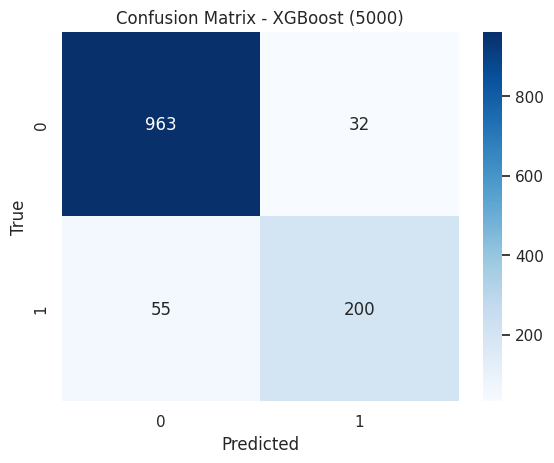

In [ ]:
# Confusion Matrix
cm_xgb_5000 = confusion_matrix(y_test_5000, y_pred_xgb_5000)
sns.heatmap(cm_xgb_5000, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost (5000)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Step 9. Comparative Analysis and Reporting**
*   Consolidate and Present Results

In [ ]:
results = {
        'Model': ['Decision Tree (1K)', 'XGBoost (1K)',
                  'Decision Tree (2K)', 'XGBoost (2K)'],
        'Accuracy': [accuracy_dt_4000 if df_4000 is not None else np.nan, accuracy_xgb_4000 if df_4000 is not None else np.nan,
                     accuracy_dt_5000 if df_5000 is not None else np.nan, accuracy_xgb_5000 if df_5000 is not None else np.nan],
        'Precision': [precision_dt_4000 if df_4000 is not None else np.nan, precision_xgb_4000 if df_4000 is not None else np.nan,
                      precision_dt_5000 if df_5000 is not None else np.nan, precision_xgb_5000 if df_5000 is not None else np.nan],
        'Recall': [recall_dt_4000 if df_4000 is not None else np.nan, recall_xgb_4000 if df_4000 is not None else np.nan,
                   recall_dt_5000 if df_5000 is not None else np.nan, recall_xgb_5000 if df_5000 is not None else np.nan],
        'F1-Score': [f1_dt_4000 if df_4000 is not None else np.nan, f1_xgb_4000 if df_4000 is not None else np.nan,
                     f1_dt_5000 if df_5000 is not None else np.nan, f1_xgb_5000 if df_5000 is not None else np.nan]
    }
results_df = pd.DataFrame(results)
print("\n--- Model Performance Summary ---")
print(results_df.round(4))


--- Model Performance Summary ---
                Model  Accuracy  Precision  Recall  F1-Score
0  Decision Tree (1K)    0.8980     0.7800  0.8058    0.7927
1        XGBoost (1K)    0.9410     0.9336  0.8140    0.8698
2  Decision Tree (2K)    0.9080     0.7692  0.7843    0.7767
3        XGBoost (2K)    0.9304     0.8621  0.7843    0.8214


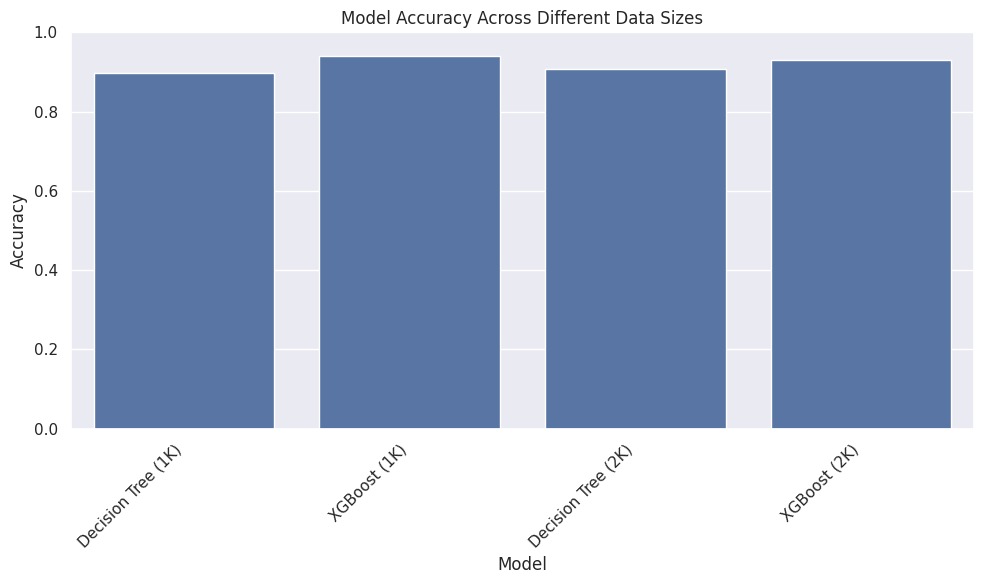

In [ ]:
# Visualization (Accuracy Comparison)
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Accuracy Across Different Data Sizes')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Step 10: Interpreting the Results and Conclusion**

Model XGBoost performed best overall since F1-Scores for all data set (4000 vs. 5000) results are higher than that of Model Decision Tree. The F1-score is often a good overall metric when you need a balance between minimizing both false positives and false negatives, and when your dataset is imbalanced. In our case, we have 20% of observations has sarcopenia disease.  

All in all, there is no significant differences between them. The results are very close. On the other hand, since it is a medical condition prediction case, it is better to use recall parameter to compare two models. By means of recal parameter, it is possible to catch missing positives which is very important medical wise.

If we take recall parameter into consideration, it can be said that Model Decision Tree is better predictor model than XGBoost in our case.
